<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Sistema inteligente para ayudar a detectar posibles reclamos (glosas) en las cuentas médicas previo al cobro, de una clínica en Colombia - Audimed</h1></center>
<center><h2>Trabajo Fin de Master<br>Máster Universitario en Análisis y Visualización de Datos Masivos / Visual Analytics and Big Data</h2></center>

<h3>Presentado por: Jacqueline Guzmán Rodriguez</h3>
<h4>Tipo de trabajo: Desarrollo Software <br>
Director: Juan Carlos Rincon Acuña <br>
Fecha: Junio/2024</h4>

<h3> <font color="#040078">Notebook de exploración de los datos, despues de transformados</font></h3>
<h4>Del proceso de transformación se obtiene un archivo CSV (claims.cvs), el cual es el que vamos a utilizar de ahora en adelante, en este script se exploran los datos para detectar posibles patrones de los datos, antes del modelo de datos</h4>
<h5><font color="#C62400">Licencia del Notebook CC BY-NC-SA 4.0 DEED <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/" target="_blank]">https://creativecommons.org/licenses/by-nc-sa/4.0/</a></font></h5/>

## Importación de librerias necesarias

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

## Carga de archivo con datos transformados claims.cvs
#### Se pueden descargar los datos de la plataforma kaggle en el siguiente link: 
##### https://www.kaggle.com/datasets/jacquelineguzman/claims-of-medical-billing/

In [2]:
# Read file CSV Download of https://www.kaggle.com/datasets/jacquelineguzman/claims-of-medical-billing/
file_cvs = "claims.csv"
# Create dataframe with information of file CSV
df = pd.read_csv(file_cvs, delimiter=',', encoding='utf-8')

In [3]:
# Define colums target (CLAIM)
columns = df.columns
target = "CLAIM"
x_columns = columns.drop(target)

In [4]:
# Update datatype int64 to int32 and float64 to float32, because it is necessary to use less RAM
float_columns = ['QUANTITY_PRODUCT_SERVICE', 'SALES_PRICE', 'INVOICED_PRICE']
int_columns = columns.drop(float_columns)
df[float_columns]=df[float_columns].astype(np.float32)
df[int_columns]=df[int_columns].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104443 entries, 0 to 6104442
Data columns (total 54 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   TYPE_ATTENTION                int32  
 1   DETAIL_ATTENTION              int32  
 2   SEQ_ATTENTION                 int32  
 3   SEQ_PATIENT                   int32  
 4   SEQ_ATTEN_PATIENT             int32  
 5   ROOM_ATTENTION                int32  
 6   MAIN_SPECIALITY               int32  
 7   SEQ_DOCTOR                    int32  
 8   TYPE_PAYMENT_REPON            int32  
 9   PAYMENT_REPONSIBLE            int32  
 10  FEE_ATTENTION                 int32  
 11  SEX_PATIENT                   int32  
 12  AGE_PATIENT_START_ATTENTION   int32  
 13  AGE_PATIENT_FINISH_ATTENTION  int32  
 14  MINUTES_STAY                  int32  
 15  TYPE_AFFILIATE                int32  
 16  TYPE_AFFILIATION_REGIME       int32  
 17  NUM_HISTORY_MED_SET_1         int32  
 18  NUM_HISTORY_MED_SET_2 

In [6]:
# Verify values null
print("Null Count: "+str(df.isnull().sum().sum())+"\n")
print(df.isnull().sum())

Null Count: 0

TYPE_ATTENTION                  0
DETAIL_ATTENTION                0
SEQ_ATTENTION                   0
SEQ_PATIENT                     0
SEQ_ATTEN_PATIENT               0
ROOM_ATTENTION                  0
MAIN_SPECIALITY                 0
SEQ_DOCTOR                      0
TYPE_PAYMENT_REPON              0
PAYMENT_REPONSIBLE              0
FEE_ATTENTION                   0
SEX_PATIENT                     0
AGE_PATIENT_START_ATTENTION     0
AGE_PATIENT_FINISH_ATTENTION    0
MINUTES_STAY                    0
TYPE_AFFILIATE                  0
TYPE_AFFILIATION_REGIME         0
NUM_HISTORY_MED_SET_1           0
NUM_HISTORY_MED_SET_2           0
NUM_HISTORY_MED_SET_3           0
NUM_HISTORY_MED_SET_4           0
NUM_HISTORY_MED_SET_6           0
NUM_HISTORY_MED_SET_7           0
NUM_HISTORY_MED_SET_8           0
NUM_HISTORY_MED_SET_9           0
NUM_HISTORY_MED_SET_11          0
NUM_HISTORY_MED_SET_12          0
NUM_HISTORY_MED_SET_13          0
NUM_HISTORY_MED_SET_14          0

In [7]:
# Normalize data via MinMaxScaler function
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=columns)

In [8]:
# Descritive Statistics
df_stats = df.describe()
df_stats = df_stats.transpose()

df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,0.270755,0.444350,0.0,0.000000,0.000000,1.000000,1.0
DETAIL_ATTENTION,6104443.0,0.197542,0.265513,0.0,0.000000,0.000000,0.400000,1.0
SEQ_ATTENTION,6104443.0,0.495478,0.290176,0.0,0.243470,0.490141,0.747169,1.0
SEQ_PATIENT,6104443.0,0.378775,0.269355,0.0,0.143645,0.325944,0.586092,1.0
SEQ_ATTEN_PATIENT,6104443.0,0.035037,0.054041,0.0,0.000000,0.018868,0.056604,1.0
ROOM_ATTENTION,6104443.0,0.001972,0.033084,0.0,0.000000,0.000000,0.000000,1.0
MAIN_SPECIALITY,6104443.0,0.188296,0.248650,0.0,0.000000,0.000000,0.386158,1.0
SEQ_DOCTOR,6104443.0,0.382051,0.277800,0.0,0.098592,0.442879,0.582160,1.0
TYPE_PAYMENT_REPON,6104443.0,0.959849,0.196314,0.0,1.000000,1.000000,1.000000,1.0
PAYMENT_REPONSIBLE,6104443.0,0.965685,0.103579,0.0,0.980276,0.981838,0.984069,1.0


In [9]:
# Descritive Statistics
df_stats = df.describe()
df_stats = df_stats.transpose()

df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,0.270755,0.444350,0.0,0.000000,0.000000,1.000000,1.0
DETAIL_ATTENTION,6104443.0,0.197542,0.265513,0.0,0.000000,0.000000,0.400000,1.0
SEQ_ATTENTION,6104443.0,0.495478,0.290176,0.0,0.243470,0.490141,0.747169,1.0
SEQ_PATIENT,6104443.0,0.378775,0.269355,0.0,0.143645,0.325944,0.586092,1.0
SEQ_ATTEN_PATIENT,6104443.0,0.035037,0.054041,0.0,0.000000,0.018868,0.056604,1.0
ROOM_ATTENTION,6104443.0,0.001972,0.033084,0.0,0.000000,0.000000,0.000000,1.0
MAIN_SPECIALITY,6104443.0,0.188296,0.248650,0.0,0.000000,0.000000,0.386158,1.0
SEQ_DOCTOR,6104443.0,0.382051,0.277800,0.0,0.098592,0.442879,0.582160,1.0
TYPE_PAYMENT_REPON,6104443.0,0.959849,0.196314,0.0,1.000000,1.000000,1.000000,1.0
PAYMENT_REPONSIBLE,6104443.0,0.965685,0.103579,0.0,0.980276,0.981838,0.984069,1.0


In [10]:
# Free uo dataframe (dt_stats) memory space
df_stats.drop(df_stats.index, inplace=True)

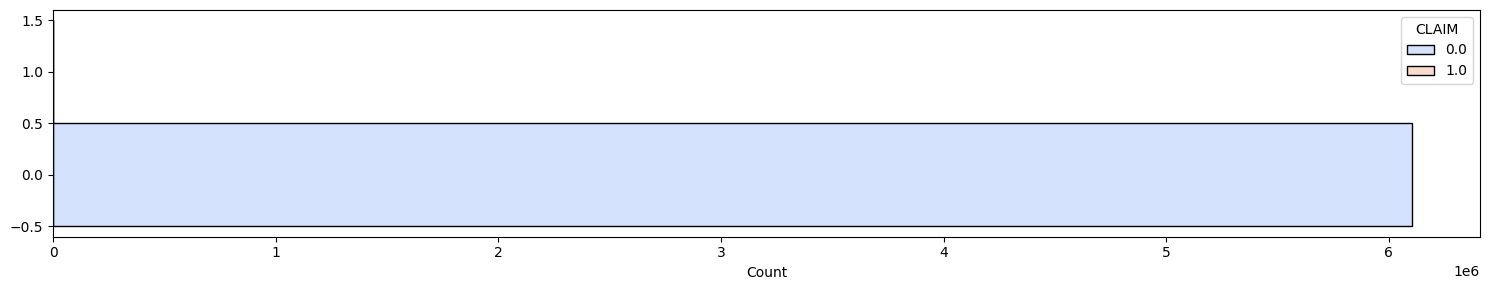

In [56]:
# Behavior of the target variable (histogram)
plt.figure(1, figsize=(15,3))
#f, ax = plt.subplots(figsize=(10, 3))
#sns.despine(f)
palette="coolwarm"
sns.histplot(data=df, y=target, hue=target, palette=palette, discrete=True)
plt.ylabel(None)
plt.tight_layout()

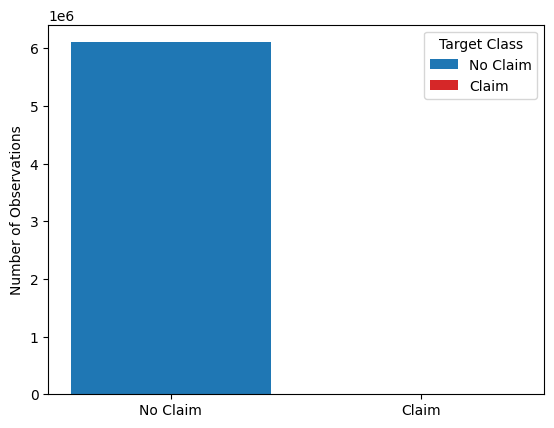

In [70]:
fig, ax = plt.subplots()
labels = ['No Claim', 'Claim']
counts = pd.value_counts(df[target], sort = True)
bar_labels = ['No Claim', 'Claim']
bar_colors = ['tab:blue', 'tab:red']
ax.bar(labels, counts, label=bar_labels, color=bar_colors)
ax.set_ylabel('Number of Observations')
#ax.set_title('Fruit supply by kind and color')
ax.legend(title='Target Class')
plt.show()

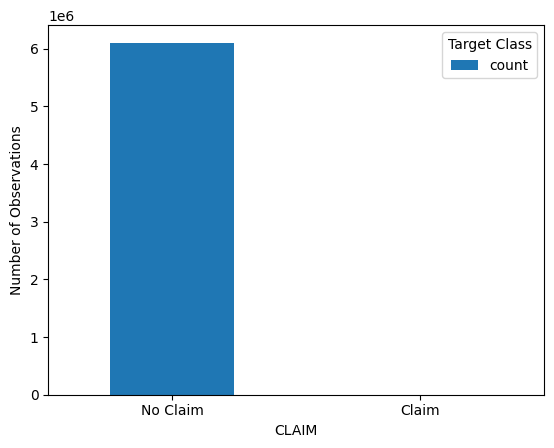

In [66]:
count_classes = pd.value_counts(df[target], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ["No Claim","Claim"])
#plt.xlabel("Target Class")
plt.ylabel("Number of Observations")
plt.legend(title="Target Class")

In [61]:
# Verify values frecuency of target variable
print(str(target)+':\n'+str(df[target].unique())+'\n')
print(df[target].value_counts())

CLAIM:
[0. 1.]

CLAIM
0.0    6104323
1.0        120
Name: count, dtype: int64


In [ ]:
# Correlation matrix
corr = df.corr(method="pearson")
plt.figure(figsize=(20,20)) 
mask=np.triu(np.ones_like(corr,dtype=bool))
cmap='coolwarm'
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, linewidths=0.5, fmt='.2f', annot=False) 
plt.show()

In [ ]:
# Correlation matrix (Data)
corr

In [ ]:
# Free uo dataframe (corr) memory space
corr.drop(corr.index, inplace=True)